In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import datetime
import wbdata as wb
import seaborn as sn
from datetime import timedelta, date
from pandas_datareader import data
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

## Get Stock Data 

In [5]:
!pip install wbdata

In [6]:
stock = {'GFDD.OM.02': 'Global Financial Development'}
im = {'SM.POP.NETM': 'Population estimates and projections'}

In [7]:
stock_data = wb.get_dataframe(stock, country='USA', convert_date=True)
im_data = wb.get_dataframe(im, country='USA', convert_date=True)

In [8]:
#Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', 'NFLX']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2015-01-01'
end_date = '2018-03-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)

In [9]:
Stock_data=panel_data.to_frame

In [10]:
from pandas_datareader import DataReader

In [11]:
def get(tickers, startdate, enddate):
  stock=DataReader(tickers,'yahoo',start=startdate,end=enddate)
  return stock

#### Get Applied Material stock, based on Santa Clara

In [12]:
AppliedM = get('AMAT','1-1-2015', datetime.date.today())

In [13]:
AppliedM=AppliedM.loc[:,['Close']]

In [14]:
AppliedM=AppliedM.resample('M').mean()

In [15]:
AppliedM=AppliedM.rename(columns={'Close':'AppliedMaterial'})

In [16]:
AppliedM

,AppliedMaterial
Date,
2015-01-31,23.77
2015-02-28,24.32
2015-03-31,23.82
2015-04-30,21.75
2015-05-31,19.95
2015-06-30,19.88
2015-07-31,18.25
2015-08-31,16.45
2015-09-30,15.36


#### Get Cisco stock, based on San Jose

In [17]:
Cisco = get('CSCO','1-1-2015',datetime.date.today())

In [18]:
Cisco = Cisco.loc[:,['Close']]

In [19]:
Cisco=Cisco.resample('M').mean()

In [20]:
Cisco=Cisco.rename(columns={'Close':'Cisco'})

In [21]:
Cisco.head()

,Cisco
Date,
2015-01-31,27.57
2015-02-28,28.50
2015-03-31,28.38
2015-04-30,28.20
2015-05-31,29.27


#### Get Juniper stock, based on Sunnyvale

In [22]:
Juniper = get('JNPR','1-1-2015', datetime.date.today())

In [23]:
Juniper = Juniper.loc[:,['Close']]

In [24]:
Juniper = Juniper.resample('M').mean()

In [25]:
Juniper=Juniper.rename(columns={'Close':'Juniper'})

In [26]:
Juniper.head()

,Juniper
Date,
2015-01-31,22.24
2015-02-28,23.64
2015-03-31,23.34
2015-04-30,24.34
2015-05-31,27.26


#### Get Facebook stock, based on Menlo Park

In [27]:
Facebook = get('FB','1-1-2015',datetime.date.today())

In [28]:
Facebook = Facebook.loc[:,['Close']]

In [29]:
Facebook = Facebook.resample('M').mean()

In [30]:
Facebook=Facebook.rename(columns={'Close':'Facebook'})

In [31]:
Facebook.head()

,Facebook
Date,
2015-01-31,76.72
2015-02-28,76.95
2015-03-31,81.01
2015-04-30,82.09
2015-05-31,79.42


#### Get Google stock, based on Mountain View

In [334]:
Google = get('GOOGL','1-1-2015',datetime.date.today())

In [335]:
Google = Google.loc[:,['Close']]

In [336]:
Google=Google.resample('M').mean()

In [337]:
Google=Google.rename(columns={'Close':'Google'})

In [338]:
Google.head()

,Google
Date,
2015-01-31,515.92
2015-02-28,540.99
2015-03-31,565.97
2015-04-30,549.48
2015-05-31,547.68


### Merge stock data set

In [339]:
stock=AppliedM.join([Cisco,Juniper,Facebook,Google])
stock.head()

,AppliedMaterial,Cisco,Juniper,Facebook,Google
Date,,,,,
2015-01-31,23.77,27.57,22.24,76.72,515.92
2015-02-28,24.32,28.50,23.64,76.95,540.99
2015-03-31,23.82,28.38,23.34,81.01,565.97
2015-04-30,21.75,28.20,24.34,82.09,549.48
2015-05-31,19.95,29.27,27.26,79.42,547.68


## Get Single House's Home Value Data

In [162]:
single = pd.read_csv('Single.csv').rename(columns=lambda x: x.strip())

In [365]:
# Slice out 2015-2018 as trial for now
single=single[single.columns[~single.columns.str.contains('1996-')]]
single=single[single.columns[~single.columns.str.contains('1997-')]]
single=single[single.columns[~single.columns.str.contains('1998-')]]
single=single[single.columns[~single.columns.str.contains('1999-')]]
single=single[single.columns[~single.columns.str.contains('2000-')]]
single=single[single.columns[~single.columns.str.contains('2001-')]]
single=single[single.columns[~single.columns.str.contains('2002-')]]
single=single[single.columns[~single.columns.str.contains('2003-')]]
single=single[single.columns[~single.columns.str.contains('2004-')]]
single=single[single.columns[~single.columns.str.contains('2005-')]]
single=single[single.columns[~single.columns.str.contains('2006-')]]
single=single[single.columns[~single.columns.str.contains('2007-')]]
single=single[single.columns[~single.columns.str.contains('2008-')]]
single=single[single.columns[~single.columns.str.contains('2009-')]]
single=single[single.columns[~single.columns.str.contains('2010-')]]
single=single[single.columns[~single.columns.str.contains('2011-')]]
single=single[single.columns[~single.columns.str.contains('2012-')]]
single=single[single.columns[~single.columns.str.contains('2013-')]]
single=single[single.columns[~single.columns.str.contains('2014-')]]


single['House Type']='single'
single.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
0,6181,New York,NY,New York,Queens,1,465500,466400,466800,468800,...,559000,563900,567600,571100,574900,578100,580400,584400,588900,single
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,552200,556100,559200,562900,...,665800,669100,671800,675900,681700,686900,692400,698000,701900,single
2,17426,Chicago,IL,Chicago,Cook,3,168400,168200,168600,169600,...,194200,194700,194800,195500,196700,198000,198500,198700,199600,single
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,173000,172900,173000,173400,...,196400,198000,199600,201300,202900,204200,205800,207500,208900,single
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,183400,184600,186100,187900,...,225700,227800,229500,230900,232500,234600,236300,237200,238000,single


### Slice Out Santa Clara Part

In [179]:
sc=single[(single['RegionName']=='Santa Clara') & (single['State']=='CA')]
sc

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
236,13713,Santa Clara,CA,San Jose,Santa Clara,237,886300,899000,915700,933700,...,1157100,1175000,1195300,1216800,1245500,1284600,1327800,1372600,1404600,single


In [366]:
# Slice out montyly home value we need
scsingle=sc.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
scsingle.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
236,886300,899000,915700,933700,949600,963000,974300,984800,994800,1004500,...,1141600,1157100,1175000,1195300,1216800,1245500,1284600,1327800,1372600,1404600


In [181]:
scsingle.columns = pd.to_datetime(scsingle.columns,format='%Y%m', errors='ignore')
scsingle=scsingle.transpose()
scsingle.head()

,236
2015-01,886300
2015-02,899000
2015-03,915700
2015-04,933700
2015-05,949600


In [298]:
scsingle.columns=['HomeValueSingle']
scsingle.head()

,HomeValueSingle
2015-01,886300
2015-02,899000
2015-03,915700
2015-04,933700
2015-05,949600


## Get Condo House's Home Value Data

In [155]:
condo = pd.read_csv('Condo.csv').rename(columns=lambda x: x.strip())

In [156]:
condo=condo[condo.columns[~condo.columns.str.contains('1996-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1997-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1998-')]]
condo=condo[condo.columns[~condo.columns.str.contains('1999-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2000-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2001-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2002-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2003-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2004-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2005-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2006-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2007-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2008-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2009-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2009-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2010-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2011-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2012-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2013-')]]
condo=condo[condo.columns[~condo.columns.str.contains('2014-')]]
condo['House Type']='condo'
condo.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
0,6181,New York,NY,New York,Queens,1,610900,616300,623000,628800,...,803300,828400,838700,843800,851800,862100,868900.00,871900.00,876700.00,condo
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,436000,438600,441600,444300,...,511400,513900,516800,521500,526800,532800,539600.00,545800.00,549500.00,condo
2,17426,Chicago,IL,Chicago,Cook,3,213300,213700,215700,217900,...,240100,240800,241900,242600,242400,241000,239400.00,238700.00,239100.00,condo
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,96400,96400,96700,97300,...,119600,119900,119800,120600,122200,123400,124200.00,125000.00,125800.00,condo
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,115000,115300,116100,117000,...,140400,141900,143400,144900,146700,148300,149500.00,150600.00,151500.00,condo


In [157]:
sc1=condo[(condo['RegionName']=='Santa Clara') & (condo['State']=='CA')]
sc1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
196,13713,Santa Clara,CA,San Jose,Santa Clara,197,594500,601300,611500,625300,...,790200,795800,805600,819400,834600,852700,876800.00,903100.00,921200.00,condo


In [158]:
sccondo=sc1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
sccondo.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
196,594500,601300,611500,625300,640600,655700,668300,678400,685300,689300,...,780600,790200,795800,805600,819400,834600,852700,876800.00,903100.00,921200.00


In [159]:
sccondo.columns = pd.to_datetime(sccondo.columns,format='%Y%m', errors='ignore')
sccondo=sccondo.transpose()
sccondo.head()

,196
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [299]:
sccondo.columns=['HomeValueCondo']
sccondo.head()

,HomeValueCondo
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [300]:
# Concatenate SC home value single+condo
AM = pd.concat([scsingle, sccondo], axis=1)
AM.index = pd.to_datetime(AM.index,format='%Y%m', errors='ignore')
AM.head()

,HomeValueSingle,HomeValueCondo
2015-01,886300,594500.00
2015-02,899000,601300.00
2015-03,915700,611500.00
2015-04,933700,625300.00
2015-05,949600,640600.00


In [301]:
# Slice out the stock value for AppliedMaterial which located in SC
stockam=stock.loc[:,[ 'AppliedMaterial']]

# re-format the date before joining
stockam.index = stockam.index.strftime('%Y-%m')
stockam.columns=['StockPrice']
stockam.head()

,StockPrice
2015-01,23.77
2015-02,24.32
2015-03,23.82
2015-04,21.75
2015-05,19.95


In [302]:
# Concatenate stock with SC home value
AM1 = pd.concat([AM, stockam], axis=1)
AM1.head()

,HomeValueSingle,HomeValueCondo,StockPrice
2015-01,886300.00,594500.00,23.77
2015-02,899000.00,601300.00,24.32
2015-03,915700.00,611500.00,23.82
2015-04,933700.00,625300.00,21.75
2015-05,949600.00,640600.00,19.95


In [304]:
AM1['Location']='Santa Clara'
AM1['Stock']='AMAT'
AM1.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,886300.00,594500.00,23.77,Santa Clara,AMAT
2015-02,899000.00,601300.00,24.32,Santa Clara,AMAT
2015-03,915700.00,611500.00,23.82,Santa Clara,AMAT
2015-04,933700.00,625300.00,21.75,Santa Clara,AMAT
2015-05,949600.00,640600.00,19.95,Santa Clara,AMAT


### Slice out San Jose Part

In [192]:
sj=single[(single['RegionName']=='San Jose') & (single['State']=='CA')]
sj

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
7,33839,San Jose,CA,San Jose,Santa Clara,8,783800,793000,803700,815100,...,973000,980900,990100,1003200,1019600,1042200,1070800,1100000,1119400,single


In [193]:
sjsingle=sj.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
sjsingle.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
7,783800,793000,803700,815100,826200,835500,842600,848700,854300,857400,...,960800,973000,980900,990100,1003200,1019600,1042200,1070800,1100000,1119400


In [194]:
sjsingle.columns = pd.to_datetime(sjsingle.columns,format='%Y%m', errors='ignore')
sjsingle=sjsingle.transpose()
sjsingle.head()

,7
2015-01,783800
2015-02,793000
2015-03,803700
2015-04,815100
2015-05,826200


In [305]:
sjsingle.columns=['HomeValueSingle']
sjsingle.head()

,HomeValueSingle
2015-01,783800
2015-02,793000
2015-03,803700
2015-04,815100
2015-05,826200


In [196]:
sj1=condo[(condo['RegionName']=='Santa Clara') & (condo['State']=='CA')]
sj1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
196,13713,Santa Clara,CA,San Jose,Santa Clara,197,594500,601300,611500,625300,...,790200,795800,805600,819400,834600,852700,876800.00,903100.00,921200.00,condo


In [197]:
sjcondo=sj1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
sjcondo.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
196,594500,601300,611500,625300,640600,655700,668300,678400,685300,689300,...,780600,790200,795800,805600,819400,834600,852700,876800.00,903100.00,921200.00


In [198]:
sjcondo.columns = pd.to_datetime(sjcondo.columns,format='%Y%m', errors='ignore')
sjcondo=sjcondo.transpose()
sjcondo.head()

,196
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [306]:
sjcondo.columns=['HomeValueCondo']
sjcondo.head()

,HomeValueCondo
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [307]:
# Concatenate SJ home value single+condo
CS = pd.concat([sjsingle, sjcondo], axis=1)
CS.index = pd.to_datetime(CS.index,format='%Y%m', errors='ignore')
CS.head()

,HomeValueSingle,HomeValueCondo
2015-01,783800,594500.00
2015-02,793000,601300.00
2015-03,803700,611500.00
2015-04,815100,625300.00
2015-05,826200,640600.00


In [309]:
# Slice out the stock value for Cisco which located in SJ
stockcs=stock.loc[:,[ 'Cisco']]

In [310]:
# re-format the date before joining
stockcs.index = stockcs.index.strftime('%Y-%m')
stockcs.columns=['StockPrice']
stockcs.head()

,StockPrice
2015-01,27.57
2015-02,28.50
2015-03,28.38
2015-04,28.20
2015-05,29.27


In [311]:
# Concatenate stock with SJ home value
CS1 = pd.concat([CS, stockcs], axis=1)
CS1.head()

,HomeValueSingle,HomeValueCondo,StockPrice
2015-01,783800.00,594500.00,27.57
2015-02,793000.00,601300.00,28.50
2015-03,803700.00,611500.00,28.38
2015-04,815100.00,625300.00,28.20
2015-05,826200.00,640600.00,29.27


In [312]:
CS1['Location']='San Jose'
CS1['Stock']='CSCO'
CS1.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,783800.00,594500.00,27.57,San Jose,CSCO
2015-02,793000.00,601300.00,28.50,San Jose,CSCO
2015-03,803700.00,611500.00,28.38,San Jose,CSCO
2015-04,815100.00,625300.00,28.20,San Jose,CSCO
2015-05,826200.00,640600.00,29.27,San Jose,CSCO


### Slice Out Sunnyvale Part

In [209]:
sv=single[(single['RegionName']=='Sunnyvale') & (single['State']=='CA')]
sv

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
181,54626,Sunnyvale,CA,San Jose,Santa Clara,182,1348600,1371000,1395900,1424200,...,1712200,1729800,1749800,1774300,1806100,1847900,1896200,1946900,1982600,single


In [210]:
svsingle=sv.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
svsingle.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
181,1348600,1371000,1395900,1424200,1456900,1486100,1501500,1510300,1518600,1523100,...,1687600,1712200,1729800,1749800,1774300,1806100,1847900,1896200,1946900,1982600


In [211]:
svsingle.columns = pd.to_datetime(svsingle.columns,format='%Y%m', errors='ignore')
svsingle=svsingle.transpose()
svsingle.head()

,181
2015-01,1348600
2015-02,1371000
2015-03,1395900
2015-04,1424200
2015-05,1456900


In [313]:
svsingle.columns=['HomeValueSingle']
svsingle.head()

,HomeValueSingle
2015-01,1348600
2015-02,1371000
2015-03,1395900
2015-04,1424200
2015-05,1456900


In [213]:
sv1=condo[(condo['RegionName']=='Sunnyvale') & (condo['State']=='CA')]
sv1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
155,54626,Sunnyvale,CA,San Jose,Santa Clara,156,787300,797300,809100,822100,...,1016700,1021000,1033200,1051600,1077100,1108300,1143700.00,1178200.00,1199600.00,condo


In [214]:
svcondo=sv1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
svcondo.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
155,787300,797300,809100,822100,838100,854800,871400,885600,892400,891000,...,1007000,1016700,1021000,1033200,1051600,1077100,1108300,1143700.00,1178200.00,1199600.00


In [215]:
svcondo.columns = pd.to_datetime(svcondo.columns,format='%Y%m', errors='ignore')
svcondo=svcondo.transpose()
svcondo.head()

,155
2015-01,787300.00
2015-02,797300.00
2015-03,809100.00
2015-04,822100.00
2015-05,838100.00


In [314]:
svcondo.columns=['HomeValueCondo']
svcondo.head()

,HomeValueCondo
2015-01,787300.00
2015-02,797300.00
2015-03,809100.00
2015-04,822100.00
2015-05,838100.00


In [315]:
# Concatenate SV home value single+condo
JP = pd.concat([svsingle, svcondo], axis=1)
JP.index = pd.to_datetime(JP.index,format='%Y%m', errors='ignore')
JP.head()

,HomeValueSingle,HomeValueCondo
2015-01,1348600,787300.00
2015-02,1371000,797300.00
2015-03,1395900,809100.00
2015-04,1424200,822100.00
2015-05,1456900,838100.00


In [317]:
# Slice out the stock value for Juniper which located in SV
stockjp=stock.loc[:,[ 'Juniper']]

In [318]:
# re-format the date before joining
stockjp.index = stockjp.index.strftime('%Y-%m')
stockjp.columns=['StockPrice']
stockjp.head()

,StockPrice
2015-01,22.24
2015-02,23.64
2015-03,23.34
2015-04,24.34
2015-05,27.26


In [319]:
# Concatenate stock with SV home value
JP1 = pd.concat([JP, stockjp], axis=1)
JP1.head()

,HomeValueSingle,HomeValueCondo,StockPrice
2015-01,1348600.00,787300.00,22.24
2015-02,1371000.00,797300.00,23.64
2015-03,1395900.00,809100.00,23.34
2015-04,1424200.00,822100.00,24.34
2015-05,1456900.00,838100.00,27.26


In [320]:
JP1['Location']='Sunnyvale'
JP1['Stock']='JNPR'
JP1.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,1348600.00,787300.00,22.24,Sunnyvale,JNPR
2015-02,1371000.00,797300.00,23.64,Sunnyvale,JNPR
2015-03,1395900.00,809100.00,23.34,Sunnyvale,JNPR
2015-04,1424200.00,822100.00,24.34,Sunnyvale,JNPR
2015-05,1456900.00,838100.00,27.26,Sunnyvale,JNPR


### Slice Out Menlo Park Part

In [224]:
mp=single[(single['RegionName']=='Menlo Park') & (single['State']=='CA')]
mp

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
1121,39748,Menlo Park,CA,San Francisco,San Mateo,1122,1865200,1900700,1938200,1970300,...,2098200,2119800,2139000,2161100,2178100,2208100,2266200,2344300,2400100,single


In [225]:
mpsingle=mp.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mpsingle.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
1121,1865200,1900700,1938200,1970300,1998800,2024400,2040200,2056200,2064700,2063200,...,2073800,2098200,2119800,2139000,2161100,2178100,2208100,2266200,2344300,2400100


In [226]:
mpsingle.columns = pd.to_datetime(mpsingle.columns,format='%Y%m', errors='ignore')
mpsingle=mpsingle.transpose()
mpsingle.head()

,1121
2015-01,1865200
2015-02,1900700
2015-03,1938200
2015-04,1970300
2015-05,1998800


In [285]:
mpsingle.columns=['HomeValueSingle']
mpsingle.head()

,HomeValueSingle
2015-01,1865200
2015-02,1900700
2015-03,1938200
2015-04,1970300
2015-05,1998800


In [228]:
mp1=condo[(condo['RegionName']=='Menlo Park') & (condo['State']=='CA')]
mp1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
875,39748,Menlo Park,CA,San Francisco,San Mateo,876,984000,1013100,1022400,1035800,...,1221300,1246400,1240100,1222900,1199800,1209100,1266800.00,1314900.00,1318900.00,condo


In [229]:
mpcondo=sc1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mpcondo.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
196,594500,601300,611500,625300,640600,655700,668300,678400,685300,689300,...,780600,790200,795800,805600,819400,834600,852700,876800.00,903100.00,921200.00


In [230]:
mpcondo.columns = pd.to_datetime(mpcondo.columns,format='%Y%m', errors='ignore')
mpcondo=mpcondo.transpose()
mpcondo.head()

,196
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [286]:
mpcondo.columns=['HomeValueCondo']
mpcondo.head()

,HomeValueCondo
2015-01,594500.00
2015-02,601300.00
2015-03,611500.00
2015-04,625300.00
2015-05,640600.00


In [287]:
# Concatenate MP home value single+condo
FB = pd.concat([mpsingle, mpcondo], axis=1)
FB.index = pd.to_datetime(FB.index,format='%Y%m', errors='ignore')
FB.head()

,HomeValueSingle,HomeValueCondo
2015-01,1865200,594500.00
2015-02,1900700,601300.00
2015-03,1938200,611500.00
2015-04,1970300,625300.00
2015-05,1998800,640600.00


In [279]:
# Slice out the stock value for Facebook which located in MP
stockfb=stock.loc[:,[ 'Facebook']]

In [280]:
# re-format the date before joining
stockfb.index = stockfb.index.strftime('%Y-%m')
stockfb.columns=['StockPrice']
stockfb.head()

,StockPrice
2015-01,76.72
2015-02,76.95
2015-03,81.01
2015-04,82.09
2015-05,79.42


In [288]:
# Concatenate stock with MP home value
FB1 = pd.concat([FB, stockfb], axis=1)
FB1.head()

,HomeValueSingle,HomeValueCondo,StockPrice
2015-01,1865200.00,594500.00,76.72
2015-02,1900700.00,601300.00,76.95
2015-03,1938200.00,611500.00,81.01
2015-04,1970300.00,625300.00,82.09
2015-05,1998800.00,640600.00,79.42


In [289]:
FB1['Location']='Menlo Park'
FB1['Stock']='FB'
FB1.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,1865200.00,594500.00,76.72,Menlo Park,FB
2015-02,1900700.00,601300.00,76.95,Menlo Park,FB
2015-03,1938200.00,611500.00,81.01,Menlo Park,FB
2015-04,1970300.00,625300.00,82.09,Menlo Park,FB
2015-05,1998800.00,640600.00,79.42,Menlo Park,FB


### Slice Out Mountain View Part

In [340]:
mv=single[(single['RegionName']=='Mountain View') & (single['State']=='CA')]
mv

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
487,32999,Mountain View,CA,San Jose,Santa Clara,488,1484200,1518300,1553000,1590200,...,1882600,1902100,1922500,1946400,1978900,2026100,2084900,2151400,2200000,single


In [341]:
mvsingle=mv.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mvsingle.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
487,1484200,1518300,1553000,1590200,1623500,1649600,1672500,1688600,1689200,1685300,...,1861200,1882600,1902100,1922500,1946400,1978900,2026100,2084900,2151400,2200000


In [342]:
mvsingle.columns = pd.to_datetime(mvsingle.columns,format='%Y%m', errors='ignore')
mvsingle=mvsingle.transpose()
mvsingle.head()

,487
2015-01,1484200
2015-02,1518300
2015-03,1553000
2015-04,1590200
2015-05,1623500


In [343]:
mvsingle.columns=['HomeValueSingle']
mvsingle.head()

,HomeValueSingle
2015-01,1484200
2015-02,1518300
2015-03,1553000
2015-04,1590200
2015-05,1623500


In [344]:
mv1=condo[(condo['RegionName']=='Mountain View') & (condo['State']=='CA')]
mv1

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2015-01,2015-02,2015-03,2015-04,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
404,32999,Mountain View,CA,San Jose,Santa Clara,405,815600,827700,843300,862100,...,1094800,1104400,1113500,1125000,1143100,1170400,1205100.00,1241500.00,1266200.00,condo


In [345]:
mvcondo=mv1.loc[:,[ '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01']]
mvcondo.head()

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01
404,815600,827700,843300,862100,883800,906100,925000,937700,947100,955400,...,1080200,1094800,1104400,1113500,1125000,1143100,1170400,1205100.00,1241500.00,1266200.00


In [346]:
mvcondo.columns = pd.to_datetime(mvcondo.columns,format='%Y%m', errors='ignore')
mvcondo=mvcondo.transpose()
mvcondo.head()

,404
2015-01,815600.00
2015-02,827700.00
2015-03,843300.00
2015-04,862100.00
2015-05,883800.00


In [347]:
mvcondo.columns=['HomeValueCondo']
mvcondo.head()

,HomeValueCondo
2015-01,815600.00
2015-02,827700.00
2015-03,843300.00
2015-04,862100.00
2015-05,883800.00


In [348]:
# Concatenate MV home value single+condo
GG = pd.concat([mvsingle, mvcondo], axis=1)
GG.index = pd.to_datetime(GG.index,format='%Y%m', errors='ignore')
GG.head()

,HomeValueSingle,HomeValueCondo
2015-01,1484200,815600.00
2015-02,1518300,827700.00
2015-03,1553000,843300.00
2015-04,1590200,862100.00
2015-05,1623500,883800.00


In [354]:
# Slice out the stock value for Google which located in MV
stockgg=stock.loc[:,[ 'Google']]

In [355]:
# re-format the date before joining
stockgg.index = stockgg.index.strftime('%Y-%m')
stockgg.columns=['StockPrice']
stockgg.head()

,StockPrice
2015-01,515.92
2015-02,540.99
2015-03,565.97
2015-04,549.48
2015-05,547.68


In [356]:
# Concatenate stock with MV home value
GG1 = pd.concat([GG, stockgg], axis=1)
GG1.head()

,HomeValueSingle,HomeValueCondo,StockPrice
2015-01,1484200.00,815600.00,515.92
2015-02,1518300.00,827700.00,540.99
2015-03,1553000.00,843300.00,565.97
2015-04,1590200.00,862100.00,549.48
2015-05,1623500.00,883800.00,547.68


In [359]:
GG1['Location']='Mountain View'
GG1['Stock']='GOOGL'
GG1.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,1484200.00,815600.00,515.92,Mountain View,GOOGL
2015-02,1518300.00,827700.00,540.99,Mountain View,GOOGL
2015-03,1553000.00,843300.00,565.97,Mountain View,GOOGL
2015-04,1590200.00,862100.00,549.48,Mountain View,GOOGL
2015-05,1623500.00,883800.00,547.68,Mountain View,GOOGL


## Find Correlation Between Home Value and Stock

#### Facebook-Menlo Park Correlation

In [323]:
FB2=FB1.copy()
FB2['stockpct']= (FB2.StockPrice - FB2.StockPrice.shift(1))/FB2.StockPrice.shift(1)#currently use monthly pct, can change it to yearly once involve more data
FB2['singlepct']= (FB2.HomeValueSingle - FB2.HomeValueSingle.shift(1))/FB2.HomeValueSingle.shift(1)
FB2['condopct']= (FB2.HomeValueCondo - FB2.HomeValueCondo.shift(1))/FB2.HomeValueCondo.shift(1)
FB2.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock,stockpct,singlepct,condopct
2015-01,1865200.00,594500.00,76.72,Menlo Park,FB,nan,nan,nan
2015-02,1900700.00,601300.00,76.95,Menlo Park,FB,0.00,0.02,0.01
2015-03,1938200.00,611500.00,81.01,Menlo Park,FB,0.05,0.02,0.02
2015-04,1970300.00,625300.00,82.09,Menlo Park,FB,0.01,0.02,0.02
2015-05,1998800.00,640600.00,79.42,Menlo Park,FB,-0.03,0.01,0.02


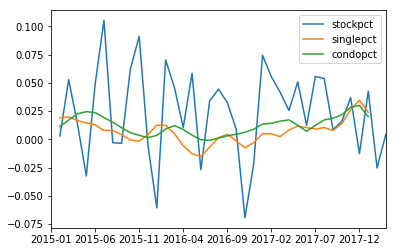

In [296]:
%matplotlib inline
FB2[['stockpct','singlepct','condopct']].plot();

In [297]:
FB2[['stockpct','singlepct','condopct']].corr()

,stockpct,singlepct,condopct
stockpct,1.00,0.04,0.09
singlepct,0.04,1.00,0.77
condopct,0.09,0.77,1.00


#### Juniper-Sunnyvale Correlation

In [324]:
JP2=JP1.copy()
JP2['stockpct']= (JP2.StockPrice - JP2.StockPrice.shift(1))/JP2.StockPrice.shift(1)
JP2['singlepct']= (JP2.HomeValueSingle - JP2.HomeValueSingle.shift(1))/JP2.HomeValueSingle.shift(1)
JP2['condopct']= (JP2.HomeValueCondo - JP2.HomeValueCondo.shift(1))/JP2.HomeValueCondo.shift(1)
JP2.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock,stockpct,singlepct,condopct
2015-01,1348600.00,787300.00,22.24,Sunnyvale,JNPR,nan,nan,nan
2015-02,1371000.00,797300.00,23.64,Sunnyvale,JNPR,0.06,0.02,0.01
2015-03,1395900.00,809100.00,23.34,Sunnyvale,JNPR,-0.01,0.02,0.01
2015-04,1424200.00,822100.00,24.34,Sunnyvale,JNPR,0.04,0.02,0.02
2015-05,1456900.00,838100.00,27.26,Sunnyvale,JNPR,0.12,0.02,0.02


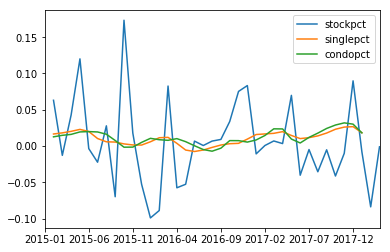

In [325]:
JP2[['stockpct','singlepct','condopct']].plot();

In [326]:
JP2[['stockpct','singlepct','condopct']].corr()

,stockpct,singlepct,condopct
stockpct,1.00,0.15,-0.05
singlepct,0.15,1.00,0.85
condopct,-0.05,0.85,1.00


#### Cisco-San Jose Correlation

In [327]:
CS2=CS1.copy()
CS2['stockpct']= (CS2.StockPrice - CS2.StockPrice.shift(1))/CS2.StockPrice.shift(1)
CS2['singlepct']= (CS2.HomeValueSingle - CS2.HomeValueSingle.shift(1))/CS2.HomeValueSingle.shift(1)
CS2['condopct']= (CS2.HomeValueCondo - CS2.HomeValueCondo.shift(1))/CS2.HomeValueCondo.shift(1)
CS2.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock,stockpct,singlepct,condopct
2015-01,783800.00,594500.00,27.57,San Jose,CSCO,nan,nan,nan
2015-02,793000.00,601300.00,28.50,San Jose,CSCO,0.03,0.01,0.01
2015-03,803700.00,611500.00,28.38,San Jose,CSCO,-0.00,0.01,0.02
2015-04,815100.00,625300.00,28.20,San Jose,CSCO,-0.01,0.01,0.02
2015-05,826200.00,640600.00,29.27,San Jose,CSCO,0.04,0.01,0.02


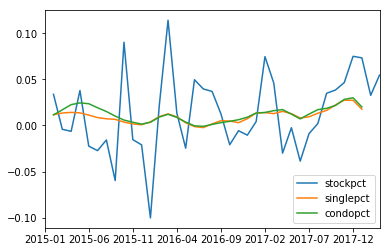

In [328]:
CS2[['stockpct','singlepct','condopct']].plot();

In [329]:
CS2[['stockpct','singlepct','condopct']].corr()

,stockpct,singlepct,condopct
stockpct,1.00,0.34,0.23
singlepct,0.34,1.00,0.90
condopct,0.23,0.90,1.00


#### Applied Material-Santa Clara Correlation

In [330]:
AM2=AM1.copy()
AM2['stockpct']= (AM2.StockPrice - AM2.StockPrice.shift(1))/AM2.StockPrice.shift(1)
AM2['singlepct']= (AM2.HomeValueSingle - AM2.HomeValueSingle.shift(1))/AM2.HomeValueSingle.shift(1)
AM2['condopct']= (AM2.HomeValueCondo - AM2.HomeValueCondo.shift(1))/AM2.HomeValueCondo.shift(1)
AM2.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock,stockpct,singlepct,condopct
2015-01,886300.00,594500.00,23.77,Santa Clara,AMAT,nan,nan,nan
2015-02,899000.00,601300.00,24.32,Santa Clara,AMAT,0.02,0.01,0.01
2015-03,915700.00,611500.00,23.82,Santa Clara,AMAT,-0.02,0.02,0.02
2015-04,933700.00,625300.00,21.75,Santa Clara,AMAT,-0.09,0.02,0.02
2015-05,949600.00,640600.00,19.95,Santa Clara,AMAT,-0.08,0.02,0.02


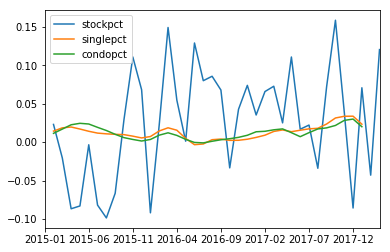

In [331]:
AM2[['stockpct','singlepct','condopct']].plot();

In [332]:
AM2[['stockpct','singlepct','condopct']].corr()

,stockpct,singlepct,condopct
stockpct,1.00,-0.11,-0.33
singlepct,-0.11,1.00,0.85
condopct,-0.33,0.85,1.00


#### Google-Mountain View Correlation

In [360]:
GG2=GG1.copy()
GG2['stockpct']= (GG2.StockPrice - GG2.StockPrice.shift(1))/GG2.StockPrice.shift(1) #currently use monthly pct, can change it to yearly once involve more data
GG2['singlepct']= (GG2.HomeValueSingle - GG2.HomeValueSingle.shift(1))/GG2.HomeValueSingle.shift(1)
GG2['condopct']= (GG2.HomeValueCondo - GG2.HomeValueCondo.shift(1))/GG2.HomeValueCondo.shift(1)
GG2.head()

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock,stockpct,singlepct,condopct
2015-01,1484200.00,815600.00,515.92,Mountain View,GOOGL,nan,nan,nan
2015-02,1518300.00,827700.00,540.99,Mountain View,GOOGL,0.05,0.02,0.01
2015-03,1553000.00,843300.00,565.97,Mountain View,GOOGL,0.05,0.02,0.02
2015-04,1590200.00,862100.00,549.48,Mountain View,GOOGL,-0.03,0.02,0.02
2015-05,1623500.00,883800.00,547.68,Mountain View,GOOGL,-0.00,0.02,0.03


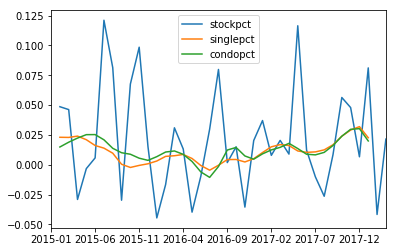

In [361]:
GG2[['stockpct','singlepct','condopct']].plot();

In [362]:
GG2[['stockpct','singlepct','condopct']].corr()

,stockpct,singlepct,condopct
stockpct,1.00,0.09,0.13
singlepct,0.09,1.00,0.87
condopct,0.13,0.87,1.00


In [364]:
# From the correlation data, stock price is not much related to House Value, no matter what house type or which area

## Merge All Stock and Home Value in Bay Area

In [363]:
House=AM1.append(CS1)
House=House.append(JP1)
House=House.append(FB1)
House=House.append(GG1)
House

,HomeValueSingle,HomeValueCondo,StockPrice,Location,Stock
2015-01,886300.00,594500.00,23.77,Santa Clara,AMAT
2015-02,899000.00,601300.00,24.32,Santa Clara,AMAT
2015-03,915700.00,611500.00,23.82,Santa Clara,AMAT
2015-04,933700.00,625300.00,21.75,Santa Clara,AMAT
2015-05,949600.00,640600.00,19.95,Santa Clara,AMAT
2015-06,963000.00,655700.00,19.88,Santa Clara,AMAT
2015-07,974300.00,668300.00,18.25,Santa Clara,AMAT
2015-08,984800.00,678400.00,16.45,Santa Clara,AMAT
2015-09,994800.00,685300.00,15.36,Santa Clara,AMAT
2015-10,1004500.00,689300.00,15.81,Santa Clara,AMAT


In [ ]:
'''Based on this final data set we can set

Location      Code
Santa Clara   0
San Jose      1
Sunnyvale     2
Menlo Park    3
Mountain View 4

Stock  Code
AMAT   0
CSCO   1
JNPR   2
FB     3
GOOGL  4

HouseType Code
Condo     0
Single    1

These will be the three features to be based on for further prediction on the relationship among features and house value and in the end decide which is the factor that finally decides the Bay Area house price
''' 

# END

In [239]:
house=single.append(condo, ignore_index=True)
house

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
0,6181,New York,NY,New York,Queens,1,536500,540900,547300,553500,559000,563900,567600,571100,574900,578100,580400.00,584400.00,588900.00,single
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,646300,651100,657200,662100,665800,669100,671800,675900,681700,686900,692400.00,698000.00,701900.00,single
2,17426,Chicago,IL,Chicago,Cook,3,189400,191000,192300,193300,194200,194700,194800,195500,196700,198000,198500.00,198700.00,199600.00,single
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,192100,192900,193800,194800,196400,198000,199600,201300,202900,204200,205800.00,207500.00,208900.00,single
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,220000,221300,222400,223700,225700,227800,229500,230900,232500,234600,236300.00,237200.00,238000.00,single
5,18959,Las Vegas,NV,Las Vegas,Clark,6,233700,235900,238400,240900,243600,246100,248400,251400,255200,259000,262000.00,264000.00,265200.00,single
6,54296,San Diego,CA,San Diego,San Diego,7,626900,625300,626700,633000,642100,649600,653600,655900,658100,662100,666700.00,672400.00,677800.00,single
7,33839,San Jose,CA,San Jose,Santa Clara,8,921500,934300,946300,960800,973000,980900,990100,1003200,1019600,1042200,1070800.00,1100000.00,1119400.00,single
8,25290,Jacksonville,FL,Jacksonville,Duval,9,151200,152400,154000,156300,158400,159700,160600,162100,163800,165200,166700.00,169100.00,171400.00,single
9,20330,San Francisco,CA,San Francisco,San Francisco,10,1187600,1199700,1215700,1232300,1245700,1259600,1274200,1283100,1290100,1302500,1323600.00,1335000.00,1332000.00,single


In [288]:
house1=house.copy()
houseca=house1[house1['State']=='CA']
houseca.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,646300,651100,657200,662100,665800,669100,671800,675900,681700,686900,692400.00,698000.00,701900.00,single
6,54296,San Diego,CA,San Diego,San Diego,7,626900,625300,626700,633000,642100,649600,653600,655900,658100,662100,666700.00,672400.00,677800.00,single
7,33839,San Jose,CA,San Jose,Santa Clara,8,921500,934300,946300,960800,973000,980900,990100,1003200,1019600,1042200,1070800.00,1100000.00,1119400.00,single
9,20330,San Francisco,CA,San Francisco,San Francisco,10,1187600,1199700,1215700,1232300,1245700,1259600,1274200,1283100,1290100,1302500,1323600.00,1335000.00,1332000.00,single
28,18203,Fresno,CA,Fresno,Fresno,29,210300,212500,215000,217200,219100,220400,221700,223100,224500,225700,226700.00,228400.00,230400.00,single


In [289]:
houseca.drop(['RegionName','State','Metro'], axis=1, inplace=True)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
houseca.head()

,RegionID,CountyName,SizeRank,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,House Type
1,12447,Los Angeles,2,646300,651100,657200,662100,665800,669100,671800,675900,681700,686900,692400.00,698000.00,701900.00,single
6,54296,San Diego,7,626900,625300,626700,633000,642100,649600,653600,655900,658100,662100,666700.00,672400.00,677800.00,single
7,33839,Santa Clara,8,921500,934300,946300,960800,973000,980900,990100,1003200,1019600,1042200,1070800.00,1100000.00,1119400.00,single
9,20330,San Francisco,10,1187600,1199700,1215700,1232300,1245700,1259600,1274200,1283100,1290100,1302500,1323600.00,1335000.00,1332000.00,single
28,18203,Fresno,29,210300,212500,215000,217200,219100,220400,221700,223100,224500,225700,226700.00,228400.00,230400.00,single


In [291]:
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
import sklearn.preprocessing as pp

In [292]:
le_county = pp.LabelEncoder()# replace classification with 0 or 1
houseca['CountyName'] = le_county.fit_transform(houseca['CountyName'].astype(str))

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [293]:
le_house = pp.LabelEncoder()# replace classification with 0 or 1
y = le_house.fit_transform(houseca['House Type'].astype(str))

In [294]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [295]:
houseca.columns

Index(['RegionID', 'CountyName', 'SizeRank', '2017-01', '2017-02', '2017-03',
       '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
       '2017-10', '2017-11', '2017-12', '2018-01', 'House Type'],
      dtype='object')

In [296]:
dc = houseca.columns.drop(['CountyName', 'SizeRank', 'House Type'])
houseca = pd.get_dummies(houseca, columns=dc, dummy_na=True) # each value in dummies become new feature
houseca.columns

Index(['CountyName', 'SizeRank', 'House Type', 'RegionID_3333.0',
       'RegionID_3379.0', 'RegionID_3491.0', 'RegionID_3493.0',
       'RegionID_3506.0', 'RegionID_3893.0', 'RegionID_3929.0',
       ...
       '2018-01_3873400.0', '2018-01_3877100.0', '2018-01_4069100.0',
       '2018-01_4133100.0', '2018-01_4332500.0', '2018-01_4762200.0',
       '2018-01_5135900.0', '2018-01_6222100.0', '2018-01_7462900.0',
       '2018-01_nan'],
      dtype='object', length=13620)

In [297]:
houseca.head()

,CountyName,SizeRank,House Type,RegionID_3333.0,RegionID_3379.0,RegionID_3491.0,RegionID_3493.0,RegionID_3506.0,RegionID_3893.0,RegionID_3929.0,...,2018-01_3873400.0,2018-01_3877100.0,2018-01_4069100.0,2018-01_4133100.0,2018-01_4332500.0,2018-01_4762200.0,2018-01_5135900.0,2018-01_6222100.0,2018-01_7462900.0,2018-01_nan
1,17,2,single,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,34,7,single,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40,8,single,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,35,10,single,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,8,29,single,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
X=houseca.drop('House Type', axis=1)

In [281]:
'''import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=.3)'''

In [299]:
X

,CountyName,SizeRank,RegionID_3333.0,RegionID_3379.0,RegionID_3491.0,RegionID_3493.0,RegionID_3506.0,RegionID_3893.0,RegionID_3929.0,RegionID_3963.0,...,2018-01_3873400.0,2018-01_3877100.0,2018-01_4069100.0,2018-01_4133100.0,2018-01_4332500.0,2018-01_4762200.0,2018-01_5135900.0,2018-01_6222100.0,2018-01_7462900.0,2018-01_nan
1,17,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,34,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,40,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,35,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,8,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,31,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,17,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,27,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,27,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
dtc_house = DecisionTreeClassifier(max_depth=3).fit(X, y)

In [310]:
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

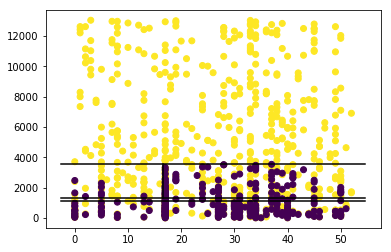

In [311]:
visualize_classifier(dtc_house, X, y)

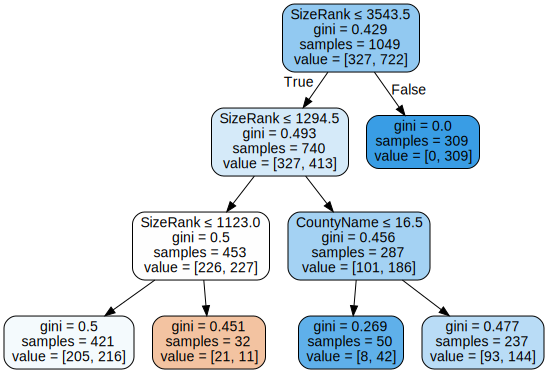

In [312]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc_house, out_file=None, 
                         feature_names=list(X.columns), 
                         #class_names = [i for i in a['species'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=False,
                        )  
graph = graphviz.Source(dot_data)  
graph  

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
rnc = RandomForestClassifier(n_estimators=100)

In [307]:
def visualize_rf(model, X, y):
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

ValueError: Number of features of the model must match the input. Model n_features is 13619 and input n_features is 2 

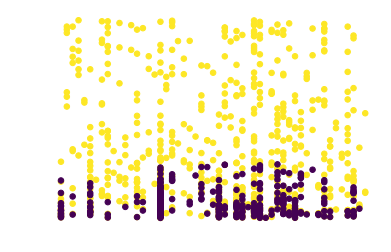

In [308]:
visualize_rf(rnc,X,y)

In [211]:
bed = pd.read_csv('Bedroom.csv').rename(columns=lambda x: x.strip())

In [214]:
bed.head()

,RegionID,RegionName,City,State,Metro,CountyName,Num of bedrooms,01-2015,02-2015,03-2015,...,04-2017,05-2017,06-2017,07-2017,08-2017,09-2017,10-2017,11-2017,12-2017,01-2018
0,275237,Roosevelt,Fresno,CA,Fresno,Fresno,1,56500.00,57400.00,58000.00,...,62800.00,63500.00,64300.00,66800.00,69900.00,71400.00,72300.00,74700.00,77200.00,78400.00
1,273088,Bullard,Fresno,CA,Fresno,Fresno,1,86500.00,86100.00,86100.00,...,92600.00,92600.00,94400.00,97900.00,99800.00,102600.00,106500.00,110100.00,110900.00,110400.00
2,276652,West San Jose,San Jose,CA,San Jose,Santa Clara,1,434000.00,442500.00,451800.00,...,611800.00,611500.00,607800.00,607000.00,610000.00,611700.00,621700.00,641000.00,654400.00,659400.00
3,273480,Downtown,San Jose,CA,San Jose,Santa Clara,1,474900.00,477900.00,481800.00,...,617300.00,622600.00,628100.00,632800.00,638000.00,647800.00,663000.00,679400.00,693500.00,701700.00
4,274756,North Valley,San Jose,CA,San Jose,Santa Clara,1,355000.00,357800.00,359300.00,...,463600.00,455800.00,449800.00,449500.00,454400.00,461000.00,470200.00,483200.00,498500.00,509600.00


In [216]:
bed.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'Num of bedrooms', '01-2015', '02-2015', '03-2015', '04-2015',
       '05-2015', '06-2015', '07-2015', '08-2015', '09-2015', '10-2015',
       '11-2015', '12-2015', '01-2016', '02-2016', '03-2016', '04-2016',
       '05-2016', '06-2016', '07-2016', '08-2016', '09-2016', '10-2016',
       '11-2016', '12-2016', '01-2017', '02-2017', '03-2017', '04-2017',
       '05-2017', '06-2017', '07-2017', '08-2017', '09-2017', '10-2017',
       '11-2017', '12-2017', '01-2018'],
      dtype='object')